### A Simplied Interface to Text Classification With Hugging Face Transformers in TensorFlow Using [ktrain](https://github.com/amaiya/ktrain)

*ktrain* requires TensorFlow 2.

In [1]:
!pip3 install -q tensorflow_gpu>=2.0

ERROR: tensorflow 2.2.0rc3 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.


In [2]:
import os
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
path = "/content/drive/My Drive/bert/"

In [4]:
os.listdir(path)

['5pressNews_200301_200410.csv',
 '한국어불용어100.txt',
 '5pressNews_v1.csv',
 '한국어불용어100.csv',
 '한국어불용어2.csv',
 'press_distilbert_predictor',
 'press_distilbert_predictor.preproc']

In [0]:
import pandas as pd
import numpy as np  
import re
df = pd.read_csv(path + '5pressNews_v1.csv')
nowords = pd.read_csv(path + "한국어불용어100.csv")
stopwords = pd.read_csv(path + "한국어불용어2.csv")

In [0]:
def delete_press_info(text):
  press_list = ['조선일보', '조선', '한겨레', '한겨레신문', '경향신문','경향', '중앙일보', '중앙', '동아일보', '동아']
  press_web_list = ['hani', 'kyunghyang', 'kahn', 'joongang', 'chosun', 'donga', '.com', '.co.kr', 'www.']
  
  for name in press_list:  
    text = re.sub(name, '', text)
  text = re.sub('[a-zA-Z0-9+-_.]+[@]+[a-zA-Z0-9-.]+', '', text)
  for web in press_web_list:
    text = re.sub(web, '', text)
  text = re.sub('\D{5}[기자]\D{5}', '', text)
  
  text = text[:-100]
  return text

In [0]:
DATA_COLUMN = "contents"
LABEL_COLUMN = "press_num"

In [0]:
df[DATA_COLUMN] = df[DATA_COLUMN].apply(lambda x: delete_press_info(x))

In [9]:
print(df[DATA_COLUMN][0])

집단감염 구로 콜센터 밀집공간 “업무와 상당한 인과관계 있다” 발병경로 확인돼 3주 만에 결정 코로나 산재 신청 이어질지 주목지난달 11일경기도청 120 경기도 콜센터에서 직원들이 코로나19를 예방둔 채 근무하고 있다. 연합뉴스수도권 최대 규모의 코로나19 집단감염이 발생한 서울 구로구 콜센터 직원이 산업재해 인정을 받았다. 국내 코로나19 확진자 가운데 첫 산재 승인 사례다.근로복지공단은 서울 구로구 콜센터에서 근무 중 코로나19에 감제출한 산재 신청을 서울업무상질병판정위원회의 심의를 거쳐 업무상 질병(산업재해)으로 인정했다고 10일 밝혔다. 위원회는 콜센터에서 상담 업무를 수행한 ㄱ씨가 밀집된 공간에서 일하는 업무 특성상 비말 등의 감염위험에 반복적으로 노출된 점을 고려해, 업무와 신청 상병(코로나19) 간 상당한 인과관계가 있다고 판단했다. ㄱ씨는 산재를 인정받게 돼, 코로나19 치료로 일하지 못임금의 70%에 해당하는 휴업급여를 받게 된다.이번 산재 인정은 신청일(3월20일)로부터 불과 3주 만에 결정됐다는 점에서 이례적이다. 일반적으로 감염성 질병은 역학조사를 거쳐 감염경로를 확산재 승인까다. 하지만 코로나19는 지방자치단체 등의 정보를 활용해 발병경로를 확인할 수 있어, 따로 역학조사 없이 신속하게 결정할 수 있었다는 게 공단 쪽 설명이다.공단은 2009년 신종플루 병 산재인정 지침’을 마련한 바 있다. ㄱ ‘업무수행 과정에서 감염된 이이 인정됐다. 하지만 ㄱ씨처럼 코로나19 확진 판정을 ·집단수용고 해도, 업무와 질병의 발생 간 인과관계가 명확하지 않은 경우 산재를 인정받는 데 어려움이 따를 수도 있다. 예를 들어, 코로나19로 인한 산재를 인정받으려면 ‘가족이나 친지 등 업무 외 일상생활에서 감염되지 않았을 것’이란 요건을 충족해야 한다. 만약 업무수행 중 바이러스에 노출됐지만 이미 가족이 확진 판정을 받은 경우라면 업무 관련성을 명확하않다. 고명주 근로복지공단 업무상질병부 차장은 “전파력이 강한 코로나19의 특성을 고려해 (업무상 질병 인정 시

In [10]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git


Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 60 (delta 23), reused 20 (delta 5), pack-reused 0
Unpacking objects: 100% (60/60), done.


In [11]:
cd Mecab-ko-for-Google-Colab

/content/Mecab-ko-for-Google-Colab


In [12]:

! bash install_mecab-ko_on_colab190912.sh 
from konlpy.tag import Mecab
tokenizer = Mecab()

Installing konlpy.....
     |████████████████████████████████| 19.4MB 1.4MB/s 
     |████████████████████████████████| 2.9MB 42.6MB/s 
     |████████████████████████████████| 92kB 10.6MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2020-04-22 11:15:22--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 18.205.93.2, 18.205.93.0, 18.205.93.1, ...
Connecting to bitbucket.org (bitbucket.org)|18.205.93.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?

In [0]:
# 한국어 불용어사전 100 사용
notword = []
for i in nowords :
  notword.append(i)
# 한국어 불용어사전 2 사용
stopword = []
for i in stopwords :
  stopword.append(i)

In [0]:
newlist = ["다","은","는","가"]
for i in newlist :
  notword.append(i)

In [0]:

#한국어 불용어사전 100사용  
morphss = []
for i, value in enumerate(df[DATA_COLUMN]) :
  
  result = []
  a = tokenizer.morphs(value)
  for k in a :
    if k not in notword :
      result.append(k)
  morphss.append(result)

lastmorphss = []
for i in morphss :
  joined_str = " ".join(i)
  lastmorphss.append(joined_str)

for i in range(len(df)) :
  df.loc[i, "morphs"] = lastmorphss[i]




In [0]:
df["morphs2"] = 0
#한국어 불용어사전 2사용  
morphss = []
for i, value in enumerate(df[DATA_COLUMN]) :
  
  result = []
  a = tokenizer.morphs(value)
  for k in a :
    if k not in stopword :
      result.append(k)
  morphss.append(result)

lastmorphss = []
for i in morphss :
  joined_str = " ".join(i)
  lastmorphss.append(joined_str)

for i in range(len(df)) :
  df.loc[i, "morphs2"] = lastmorphss[i]

In [16]:
df["morphs"].head(5)

0    집단 감염 구로 콜 센터 밀집 공간 “ 업무 와 상당 한 인과 관계 있 ” 발 병경...
1    ㆍ구로 콜 센터 직원 1 명 신속 판정 ㆍ간호사 · 조무 사 3 명 도 심의 중 ㆍ...
2    장 혜 식 교수 와 연구 , 세계 첫 성과 코로나 RNA 전사체 최초 로 분석 고해...
3    [ 19 번 부동산 대책 에 도 못 잡 았 는데 … ] 서울 강남 재건축 4 개월 ...
4    [ 토요 판 ] 다음 주 의 질문 한국 에서 출발 하 모든 미대 해 코로나 19 발...
Name: morphs, dtype: object

In [0]:
df["morphs2"].head(5)

0    집단 감염 구로 콜 센터 밀집 공간 “ 업무 와 상당 한 인과 관계 있 다 ” 발 ...
1    ㆍ구로 콜 센터 직원 1 명 신속 판정 ㆍ간호사 · 조무 사 3 명 도 심의 중 ㆍ...
2    장 혜 식 교수 와 연구 , 세계 첫 성과 코로나 RNA 전사체 최초 로 분석 고해...
3    [ 19 번 부동산 대책 에 도 못 잡 았 는데 … ] 서울 강남 재건축 4 개월 ...
4    [ 토요 판 ] 다음 주 의 질문 한국 에서 출발 하 는 모든 미대 해 코로나 19...
Name: morphs2, dtype: object

In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df[LABEL_COLUMN] = le.fit_transform(df['press'])
df[LABEL_COLUMN]
print(le.classes_)

['경향신문' '동아일보' '조선일보' '중앙일보' '한겨레']


In [0]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
X = df["morphs"].values
y = df[LABEL_COLUMN].values
X_title = df['title'].values
skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)
skf.get_n_splits(X, y)

for train_index, test_index in skf.split(X, y):
     x_train, x_test = X[train_index], X[test_index]
     title_train, title_test = X_title[train_index], X_title[test_index]
     y_train, y_test = y[train_index], y[test_index]

In [19]:
import tensorflow as tf
print(tf.__version__)

2.1.0


We then need to install *ktrain* library using pip.

In [20]:
!pip3 install -q ktrain

     |████████████████████████████████| 25.2MB 129kB/s 
     |████████████████████████████████| 421.8MB 25kB/s 
     |████████████████████████████████| 983kB 42.2MB/s 
     |████████████████████████████████| 245kB 45.6MB/s 
     |████████████████████████████████| 573kB 43.0MB/s 
     |████████████████████████████████| 471kB 44.3MB/s 
     |████████████████████████████████| 3.7MB 35.5MB/s 
     |████████████████████████████████| 890kB 40.9MB/s 
     |████████████████████████████████| 1.0MB 42.1MB/s 


### Load a Dataset Into Arrays

In [0]:
# categories = ['alt.atheism', 'soc.religion.christian',
#              'comp.graphics', 'sci.med']
# from sklearn.datasets import fetch_20newsgroups
# train_b = fetch_20newsgroups(subset='train',
#    categories=categories, shuffle=True, random_state=42)
# test_b = fetch_20newsgroups(subset='test',
#    categories=categories, shuffle=True, random_state=42)

# print('size of training set: %s' % (len(train_b['data'])))
# print('size of validation set: %s' % (len(test_b['data'])))
# print('classes: %s' % (train_b.target_names))

# x_train = train_b.data
# y_train = train_b.target
# x_test = test_b.data
# y_test = test_b.target

In [0]:
#train_b.target_names

In [0]:
#x_test[0]

## STEP 1:  Preprocess Data and Create a Transformer Model

We will use [DistilBERT](https://arxiv.org/abs/1910.01108).

In [24]:
import ktrain
from ktrain import text
MODEL_NAME = 'distilbert-base-multilingual-cased'
t = text.Transformer(MODEL_NAME, maxlen=512, classes=le.classes_)
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_test, y_test)
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=16)

/usr/local/lib/python3.6/dist-packages/ktrain/text/preprocessor.py:367: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn('The class_names argument is replacing the classes argument. Please update your code.')



preprocessing train...
language: ko
train sequence lengths:
	mean : 536
	95percentile : 1007
	99percentile : 1832


preprocessing test...
language: ko
test sequence lengths:
	mean : 532
	95percentile : 1010
	99percentile : 1621


In [25]:
trn[0]

(array([[[   101,   2070,  17196, ..., 119144,  13764,    102],
         [     1,      1,      1, ...,      1,      1,      1],
         [     0,      0,      0, ...,      0,      0,      0]],
 
        [[   101,   9657,   9984, ...,  30873,  12605,    102],
         [     1,      1,      1, ...,      1,      1,      1],
         [     0,      0,      0, ...,      0,      0,      0]],
 
        [[   101,    164,  10270, ...,    119,  10827,    102],
         [     1,      1,      1, ...,      1,      1,      1],
         [     0,      0,      0, ...,      0,      0,      0]],
 
        ...,
 
        [[   101,   9599,  37114, ...,  85533,   8982,    102],
         [     1,      1,      1, ...,      1,      1,      1],
         [     0,      0,      0, ...,      0,      0,      0]],
 
        [[   101,    124,   9281, ...,   9638, 119373,    102],
         [     1,      1,      1, ...,      1,      1,      1],
         [     0,      0,      0, ...,      0,      0,      0]],
 
        [[

## STEP 2:  Train the Model

simulating training for different learning rates... this may take a few moments...
Train for 172 steps
Epoch 1/5
172/172 [==============================] - 317s 2s/step - loss: 1.6081 - accuracy: 0.2093
Epoch 2/5
172/172 [==============================] - 310s 2s/step - loss: 1.1057 - accuracy: 0.5427
Epoch 3/5
172/172 [==============================] - 309s 2s/step - loss: 1.4284 - accuracy: 0.3514
Epoch 4/5
172/172 [==============================] - 301s 2s/step - loss: 1.7924 - accuracy: 0.2725
Epoch 5/5
172/172 [==============================] - 299s 2s/step - loss: 2.0991 - accuracy: 0.2368


done.
Visually inspect the loss plot to help identify the maximal learning rate


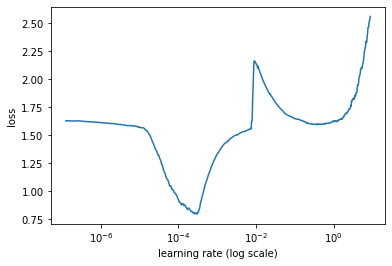

In [26]:
learner.lr_find(show_plot=True, max_epochs=5)

In [0]:
learner.fit_onecycle(1e-4, 10)



begin training using onecycle policy with max lr of 0.0001...
Train for 173 steps, validate for 22 steps
Epoch 1/10
173/173 [==============================] - 337s 2s/step - loss: 1.5188 - accuracy: 0.3139 - val_loss: 1.1909 - val_accuracy: 0.4616
Epoch 2/10
173/173 [==============================] - 336s 2s/step - loss: 0.9146 - accuracy: 0.6336 - val_loss: 0.7446 - val_accuracy: 0.7294
Epoch 3/10
173/173 [==============================] - 335s 2s/step - loss: 0.6574 - accuracy: 0.7519 - val_loss: 0.5620 - val_accuracy: 0.7786
Epoch 4/10
173/173 [==============================] - 334s 2s/step - loss: 0.5240 - accuracy: 0.7971 - val_loss: 0.5125 - val_accuracy: 0.8046
Epoch 5/10
173/173 [==============================] - 334s 2s/step - loss: 0.4813 - accuracy: 0.8174 - val_loss: 0.4498 - val_accuracy: 0.8567
Epoch 6/10
 69/173 [==========>...................] - ETA: 3:06 - loss: 0.3914 - accuracy: 0.8596

## STEP 3: Evaluate and Inspect the Model

In [0]:
learner.validate(class_names=t.get_classes())

Let's examine the validation example about which we were the most wrong.

In [0]:
learner.view_top_losses(n=1, preproc=t)

In [0]:
print(x_test[406])

This post talks more about computing than `alt.atheism` (the true category), so our model placed it into the only computing category available to it: `comp.graphics`

## STEP 4: Making Predictions on New Data in Deployment

In [0]:
predictor = ktrain.get_predictor(learner.model, preproc=t)

In [0]:
# predictor.predict('Jesus Christ is the central figure of Christianity.')

In [0]:
# # predicted probability scores for each category
# predictor.predict_proba('Jesus Christ is the central figure of Christianity.')

In [0]:
predictor.get_classes()

As expected, `soc.religion.christian` is assigned the highest probability.

Let's invoke the `explain` method to see which words contribute most to the classification.

We will need a forked version of the **eli5** library that supportes TensorFlow Keras, so let's install it first.

In [0]:
!pip3 install -q git+https://github.com/amaiya/eli5@tfkeras_0_10_1

In [0]:
y_test[5]

In [0]:
predictor.explain(x_test[4])

The words in the darkest shade of green contribute most to the classification and agree with what you would expect for this example.

We can save and reload our predictor for later deployment.

In [0]:
predictor.save(path + 'press_distilbert_predictor')

In [0]:
reloaded_predictor = ktrain.load_predictor(path + 'press_distilbert_predictor')

In [0]:
reloaded_predictor.predict('My computer monitor is really blurry.')

신문사 추가 또는 제외를 통한 모델 설명

In [0]:
df = pd.read_csv(path + '5pressNews_v1.csv')

In [0]:
checkPress = '한겨례'
df_check = df[df['press']== checkPress]
df = df[df['press']!=checkPress]

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df[LABEL_COLUMN] = le.fit_transform(df['press'])
df[LABEL_COLUMN]
print(le.classes_)

In [0]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
X = df[DATA_COLUMN].values
y = df[LABEL_COLUMN].values
X_title = df['title'].values
skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)
skf.get_n_splits(X, y)

for train_index, test_index in skf.split(X, y):
     x_train, x_test = X[train_index], X[test_index]
     title_train, title_test = X_title[train_index], X_title[test_index]
     y_train, y_test = y[train_index], y[test_index]

In [0]:
x_check = df_check['contents'].values

In [0]:
import ktrain
from ktrain import text
MODEL_NAME = 'distilbert-base-multilingual-cased'
t = text.Transformer(MODEL_NAME, maxlen=512, classes=le.classes_)
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_test, y_test)
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [0]:
learner.fit_onecycle(5e-5, 10)

In [0]:
predictor = ktrain.get_predictor(learner.model, preproc=t)

In [0]:
predict_list = predictor.predict(x_check)

In [0]:
predict_series = pd.Series(predict_list)

In [0]:
predict_series.value_counts()

In [0]:
predictor.get_classes()